### Record Linkage

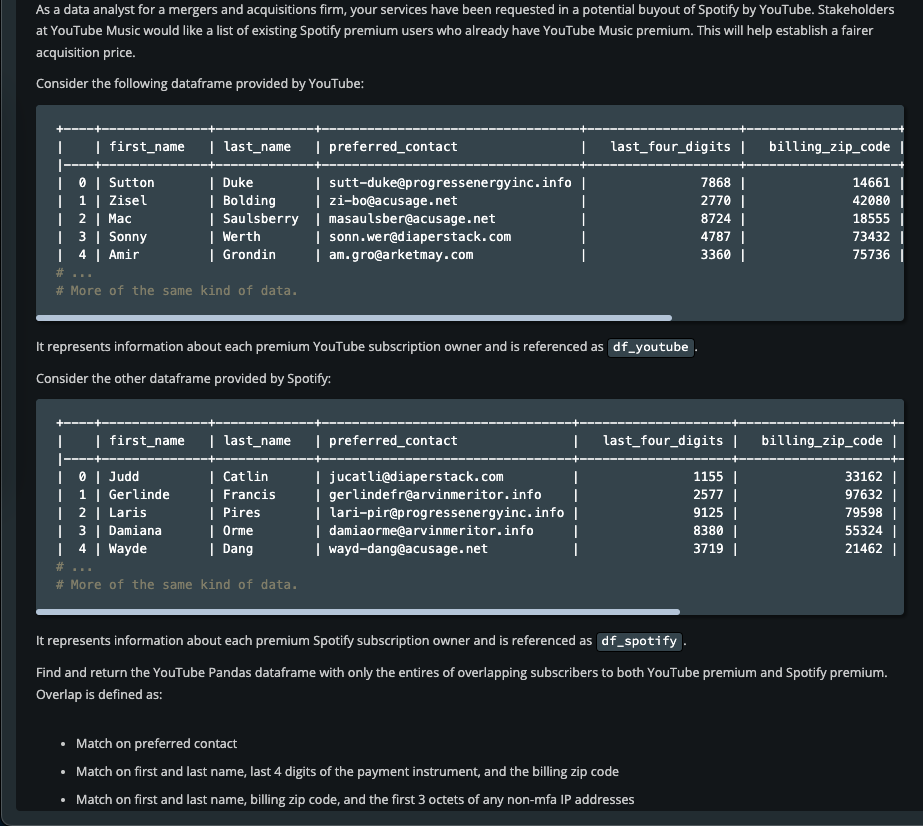

In [ ]:
'''
Pseudo Code and Comments
1. Match Conditions
    a. Same preferred contact
    b. Same First/Last Name, Last 4, Zip Code
    c. Same First/Last Name, Zip Code, First 3 Octets of IP Address
'''

import numpy as np


def link_records(df_youtube, df_spotify):
    # Write your code here.
    matched_emails = np.argwhere(np.isin(df_spotify.preferred_contact, df_youtube.preferred_contact)).ravel()
    
    df_youtube['owner'] = (df_youtube['first_name'] + ' ' + df_youtube['last_name']).str.lower()
    df_spotify['owner'] = (df_spotify['first_name'] + ' ' + df_spotify['last_name']).str.lower()
    matched_name = np.argwhere(np.isin(df_spotify.owner, df_youtube.owner))

    matched_zip = np.argwhere(np.isin(df_spotify.billing_zip_code, df_youtube.billing_zip_code))
    matched_name_and_zip = np.intersect1d(matched_name, matched_zip)
    
    matched_last_four = np.argwhere(np.isin(df_spotify.last_four_digits, df_youtube.last_four_digits))
    matched_name_and_zip_and_last_four = np.intersect1d(matched_last_four, matched_name_and_zip)

    df_spotify['first_three_octets_ip'] = df_spotify['non_mfa_ip_addresses'].map(
                                                    lambda x: [''.join(i.split('.')[:-1]) for i in x])

    df_youtube['first_three_octets_ip'] = df_youtube['non_mfa_ip_addresses'].map(
                                                    lambda x: [''.join(i.split('.')[:-1]) for i in x])

    fuzzy_matched_ip = np.argwhere(np.any(np.isin([i for i in df_spotify.first_three_octets_ip],
                                                 [j for j in df_youtube.first_three_octets_ip]), axis=1))

    matched_name_and_zip_and_ip = np.intersect1d(fuzzy_matched_ip, matched_name_and_zip)

    all_matches = np.union1d(np.union1d(matched_emails, matched_name_and_zip_and_last_four), matched_name_and_zip_and_ip)

    return df_youtube.iloc[all_matches]